# Regresión Logística Multinomial con el Dataset MNIST

Objetivo:
El objetivo de esta práctica es aplicar un modelo de regresión logística multinomial para clasificar imágenes de dígitos escritos a mano utilizando el dataset MNIST. 

Implementarás el modelo de regresión multinomial y observarás cómo se comporta con este conjunto de datos, enfocándote en los pasos previos de análisis exploratorio de datos (EDA), procesamiento de datos, entrenamiento y evaluación del modelo.

Primero importamos las librerías y cargamos el conjunto de datos. Este proceso es costoso, llevará algunos minutos.

In [1]:
# Importar librerías
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


### Descripción del dataset:

El *dataset* **MNIST** contiene imágenes en escala de grises de tamaño 28x28 píxeles que representan dígitos escritos a mano del 0 al 9. Cada imagen tiene un total de 784 píxeles (28x28 = 784) y se asocia con una etiqueta que indica el dígito correspondiente.

Aquí, `mnist` es un diccionario (más concretamente, es un objeto de tipo `Bunch`, que es similar a un diccionario en su estructura) que contiene los siguientes elementos clave:

* `mnist["data"]`: Un *DataFrame* de `Pandas` con los píxeles de las imágenes. Es un conjunto de 70,000 imágenes con 784 columnas (28x28 píxeles desplegados en una fila).
* `mnist["target"]`: Un *Series* de `Pandas` con las etiquetas correspondientes a cada imagen, que van de 0 a 9.


In [2]:
print(type(mnist["data"]), type(mnist["target"]))
mnist["data"].info()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


Para facilitar el código renombramos la matriz de entrada y el vector a predecir con la clase (dígito) representado por la matriz de pixeles.

In [3]:
# Asegurarse de que las características sean numéricas
X = mnist["data"].astype(np.float16)
y = mnist["target"].astype(np.int8)

#### Mostrar alguna imagen. 

La función `grafica_muestra` sirve para visualizar algunas de las imágenes junto con sus etiquetas.

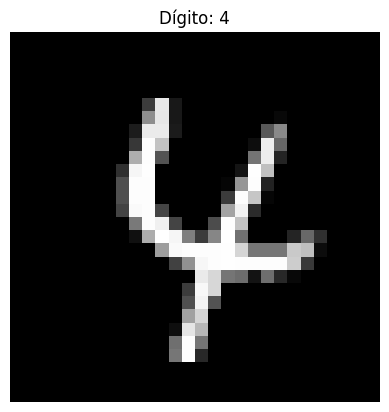

In [4]:
def grafica_muestra(X,y,i):
    
    fig,ax = plt.subplots()
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(f'Dígito: {y.iloc[i]}')
    ax.axis("off")
    plt.show()

grafica_muestra(X,y,142)

En esta práctica, aplicarás tu implementación de regresión logística multinomial al problema de clasificación multiclase usando el dataset MNIST. 
Tu tarea será entrenar un modelo de regresión logística multinomial con las imágenes de entrenamiento y luego evaluar su rendimiento en las imágenes de prueba.

**Nota**: Si encuentras problemas con la eficiencia del código debido al tamaño del dataset, puedes reducir el número de muestras de entrenamiento para realizar pruebas más rápidas. Sin embargo, asegúrate de que tu implementación funcione bien en una porción representativa de los datos.

En la siguiente celda añade las funciones programadas con la Regresión Logistica Multinomial (softmax)


## Preproceso de datos de entrada: 

* Preprocesar los datos: Si lo consideras oportuno aplica algún escalado para los datos de entrada que son vectores de pixeles con intensidad de blanco entre 0 y 255.
* Divide los datos en un conjunto de entrenamiento y prueba utilizando train_test_split de sklearn.
* Como estás implementando un modelo de clasificación multiclase, convierte las etiquetas de salida en formato *one-hot encoding*, de forma que para cada clase obtengas un vector binario.

## Entrenamiento del modelo. 

* Utiliza la función `logistic_gradient_descent` que implementaste para entrenar el modelo en el conjunto de entrenamiento. Ajusta los hiperparámetros como el número de iteraciones (n_iters) y la tasa de aprendizaje (learning_rate) según sea necesario.

* Utiliza la función `predicted_class` para predecir las clases de las imágenes en el conjunto de prueba.

## Evaluación del Modelo.

* Calcula la matriz de confusión para comparar las predicciones del modelo con las etiquetas reales de las imágenes de prueba. Esto te permitirá evaluar el rendimiento en cada clase (dígitos del 0 al 9).
Puedes usar:
```python
from sklearn.metrics import confusion_matrix
```

* Evalúa el modelo utilizando las métricas vistas en clase, como exactitud (accuracy), precisión, recall y F1-score. 
Puedes usar la función:
``` python 
from sklearn.metrics import classification_report
```

## Comparación con `sklearn`

* Por último compara el rendimiento de tu modelo con `LogisticRegression` de `sklearn`.
* Usa `GridSearchCV` para optimizar el modelo de regresión de `sklearn` y usa la combinación óptima de parámetros.